In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import t

## Question 7 
* Calcul de la pureté des de l'incertitude-type associée

In [2]:
P = 0.9975
u_P = 0.0025/np.sqrt(3)
urel_P = u_P/P
print('P : {:.4f} u_P : {:.4e} u_P/P : {:.4e}'.format(P,u_P,urel_P))

P : 0.9975 u_P : 1.4434e-03 u_P/P : 1.4470e-03


* Calcul de l'incertitude sur la masse

In [3]:
m_CaCO3 = 5.0298
u_m = 1e-3*np.sqrt(2*(0.1**2+(0.1/(2*np.sqrt(3)))**2 + (0.1/np.sqrt(3))**2 + (0.2/np.sqrt(3))**2))
urel_m = u_m/m_CaCO3
print('m_CaCO3 : {:.4f} u_m : {:.4e} u_m/m : {:.4e}'.format(m_CaCO3,u_m,urel_m))

m_CaCO3 : 5.0298 u_m : 2.3452e-04 u_m/m : 4.6626e-05


* Calcul de l'incertitude sur la masse molaire

In [4]:
M_CaCO3 = 40.078+12.011+3*15.999
u_M = np.sqrt( (0.004/np.sqrt(3))**2 + (0.002/np.sqrt(3))**2 + (3*0.001/np.sqrt(3))**2)
urel_M = u_M/M_CaCO3
print('M_CaCO3 : {:.4f} u_M : {:.4e} u_M/M : {:.4e}'.format(M_CaCO3,u_M,urel_M))

M_CaCO3 : 100.0860 u_M : 3.1091e-03 u_M/M : 3.1065e-05


* Calcul de l'incertitude sur le volume de la fiole

In [5]:
V_fiole = 5000
u_Vfiole = np.sqrt( (1.2/np.sqrt(6))**2 + (2.0)**2 + (4.2/np.sqrt(3))**2 )
urel_Vfiole = u_Vfiole/V_fiole
print('V_fiole : {:.4f} u_Vfiole : {:.4e} u_Vfiole/V_fiole : {:.4e}'.format(V_fiole,u_Vfiole,urel_Vfiole))

V_fiole : 5000.0000 u_Vfiole : 3.1812e+00 u_Vfiole/V_fiole : 6.3624e-04


## Questions 8 et 9

In [6]:
C_CaCO3 = P*m_CaCO3/M_CaCO3 * 1/(V_fiole*1e-3)
urel_CCaCO3 = np.sqrt( urel_P**2 + urel_m**2 + urel_M**2 + urel_Vfiole**2)
u_CaCO3 = urel_CCaCO3*C_CaCO3
print('C_CaCO3 : {:.4e} u_CaCO3 : {:.4e} u_CaCO3/C_CaCO3 : {:.4e}'.format(C_CaCO3,u_CaCO3,urel_CCaCO3))


C_CaCO3 : 1.0026e-02 u_CaCO3 : 1.5858e-05 u_CaCO3/C_CaCO3 : 1.5817e-03


## Question 10 

In [7]:
#nom des étudiants
students = ['Aurore', 'Olivia','Kévin','Guilhem','Thomas','Eudy','Jenifer','Émilie','Murielle','Caroline']
"""
Comme Jenifer est l'étudiante correspondant à l'indice 6, 
    les 12 volumes équivalents correspondants sont Ve[6,:]
    les 6 valeurs de V2 sont Ve[6,0:7]
    les 6 valeurs de V4 sont Ve[6,6:]
"""

#Valeurs de V2 et V4 pour tous les étudiants
Ve = np.array([[20.9,20.8,20.8,20.8,20.8,20.8,7.9,7.8,7.8,8.,7.9,8.]
,[20.4,20.3,20.4,20.5,20.6,20.5,7.9,7.8,7.8,7.9,8.,7.9]
,[20.6,20.5,20.5,20.6,20.4,20.6,7.8,8.,7.9,7.9,7.8,7.9]
,[20.4,20.4,20.6,20.4,20.6,20.6,8.,8.,7.9,8.,7.7,8.]
,[21.2,20.7,21.1,20.5,21.,21.,8.,7.9,8.,8.,8.1,8.,]
,[20.5,20.6,20.6,20.5,20.6,20.9,8.3,8.3,8.,8.2,7.9,8.1]
,[20.6,20.7,20.4,20.4,20.6,20.6,7.6,7.8,7.7,7.9,7.6,8.]
,[20.6,20.6,20.6,20.7,20.6,20.5,7.8,7.8,8.,7.7,8.,7.7]
,[20.7,20.6,20.6,20.4,20.6,20.4,7.9,8.,8.1,8.1,8.2,7.8]
,[20.5,20.5,20.4,20.5,20.4,20.3,7.9,7.8,8.,8.,7.9,8.]])

#initialisation de toutes les grandeurs annexes que l'on va calculer
Vr=np.zeros((Ve.shape[0],16))
#print(Vr)
# 0 : V2
# 1 : incertitude sur le volume moyen V2
# 2 : V4
# 3 : incertitude sur le volume moyen V4
# 4 : u_V2 totale
# 5 : EDTA
# 6 : incertitude relative sur EDTA
# 7 : incertitude absolue sur EDTA
# 8 : u_V4 totale
# 9 : TH
# 10 : incertitude relative sur TH
# 11 : incertitude absolue sur TH
# 12 : incertitude relative sur V4
# 13 : degrés de liberté effectifs
# 14 : facteur de student à 95%
# 15 : incertitude pour un intervalle de confiance à 95%

In [8]:
#Calcul de V2
Vr[:,0]=np.average(Ve[:,0:6],axis=1)
#Calcul de l'incertitude sur le volume V2 moyen
Vr[:,1]=np.std(Ve[:,0:6],ddof=1,axis=1)/np.sqrt(Ve[:,0:6].shape[1]) # =np.std(Ve[:,0:6],ddof=1,axis=1)/np.sqrt(6)
#Calcul de l'incertitude total sur V2 (type B et type A)
Vr[:,4]=np.sqrt( Vr[:,1]**2 + (0.03/np.sqrt(6))**2 + (2.1e-4*4*Vr[:,0]/np.sqrt(3))**2 + (0.05/np.sqrt(3))**2 )
#Vr[:,4]=np.sqrt( Vr[:,1]**2 + (0.03/np.sqrt(6))**2 + (2.1e-4*4*Vr[:,0]/np.sqrt(3))**2 + (0.05/np.sqrt(3))**2 )

V2B=np.sqrt( (0.03/np.sqrt(6))**2 + (2.1e-4*4*Vr[:,0]/np.sqrt(3))**2 + (0.05/np.sqrt(3))**2 )

print(V2B)

V2Bprime=np.sqrt( (0.03/np.sqrt(6))**2 + (2.1e-4*4*20.5/np.sqrt(3))**2 + (0.05/np.sqrt(3))**2 )
print(V2Bprime)

print('{:<10}\t {} \t\t {} \t {}'.format('étudiant','moyV2','u_V2,A','u_V2,tot').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,0],Vr[i,1],Vr[i,4]).replace('.',','))
    #print('{:<10}& ${:.3f}$ & ${:.3e} $ &$ {:.3e}$ \\\\'.format(student,Vr[i,0],Vr[i,1],Vr[i,4]).replace('.',',').replace('e-','\\cdot 10 ^{-'))

[0.03294318 0.03288913 0.03290133 0.03289645 0.03295808 0.03291359
 0.03290378 0.03291113 0.03290378 0.03288669]
0.032896445603337356
étudiant  	 moyV2 		 u_V2,A 	 u_V2,tot
Aurore    	 20,817 	 1,667e-02 	 3,692e-02
Olivia    	 20,450 	 4,282e-02 	 5,399e-02
Kévin     	 20,533 	 3,333e-02 	 4,684e-02
Guilhem   	 20,500 	 4,472e-02 	 5,552e-02
Thomas    	 20,917 	 1,078e-01 	 1,127e-01
Eudy      	 20,617 	 6,009e-02 	 6,852e-02
Jenifer   	 20,550 	 5,000e-02 	 5,986e-02
Émilie    	 20,600 	 2,582e-02 	 4,183e-02
Murielle  	 20,550 	 5,000e-02 	 5,986e-02
Caroline  	 20,433 	 3,333e-02 	 4,683e-02


## Questions 11 et 12

## Question 13

In [9]:
V1 = 20
u_V1 = np.sqrt( (0.03/np.sqrt(6))**2 + (2.1e-4 * 4 * V1 / np.sqrt(3))**2 )
#u_V1 = np.sqrt( (0.03/np.sqrt(3))**2 + (2.1e-4 * 4 * V1 / np.sqrt(3))**2 )
urel_V1 = u_V1/V1
print('V1 : {:.4e} u_V1 : {:.4e} u_V1/V1 : {:.4e}'.format(V1,u_V1,urel_V1))
#Calcul de [EDTA]
Vr[:,5]=C_CaCO3*20/Vr[:,0]
#u_[EDTA]/[EDTA]
Vr[:,6]=np.sqrt(urel_CCaCO3**2 + urel_V1**2 + (Vr[:,4]/Vr[:,0])**2)
#u_[EDTA]
Vr[:,7]=Vr[:,6]*Vr[:,5]
print('{:<10}\t {} \t {} \t {}'.format('étudiant','[EDTA]','uEDTA/[EDTA]','u_EDTA').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3e} \t {:.3e} \t {:.3e}'.format(student,Vr[i,5],Vr[i,6],Vr[i,7]).replace('.',','))
    #print('{:<10}& ${:.3e}$ &$ {:.3e} $&$ {:.3e}$\\\\'.format(student,Vr[i,5],Vr[i,6],Vr[i,7]).replace('.',',').replace('e-','\\cdot 10 ^{-'))

V1 : 2.0000e+01 u_V1 : 1.5623e-02 u_V1/V1 : 7.8115e-04
étudiant  	 [EDTA] 	 uEDTA/[EDTA] 	 u_EDTA
Aurore    	 9,633e-03 	 2,501e-03 	 2,410e-05
Olivia    	 9,805e-03 	 3,175e-03 	 3,113e-05
Kévin     	 9,765e-03 	 2,884e-03 	 2,816e-05
Guilhem   	 9,781e-03 	 3,232e-03 	 3,161e-05
Thomas    	 9,586e-03 	 5,669e-03 	 5,434e-05
Eudy      	 9,726e-03 	 3,762e-03 	 3,659e-05
Jenifer   	 9,757e-03 	 3,405e-03 	 3,323e-05
Émilie    	 9,734e-03 	 2,690e-03 	 2,618e-05
Murielle  	 9,757e-03 	 3,405e-03 	 3,323e-05
Caroline  	 9,813e-03 	 2,892e-03 	 2,838e-05


In [10]:
#V_4
Vr[:,2]=np.average(Ve[:,6:],axis=1)
#u_V_4,A
Vr[:,3]=np.std(Ve[:,6:],ddof=1,axis=1)/np.sqrt(Ve[:,0:6].shape[1])
#u_V_4 total
Vr[:,4]=np.sqrt(Vr[:,1]**2+(0.03/np.sqrt(6))**2+(2.1e-4*4*Vr[:,0]/np.sqrt(3))**2+(0.05/np.sqrt(3))**2)
#u_V_4 total
Vr[:,8]=np.sqrt(Vr[:,3]**2+(0.03/np.sqrt(3))**2+(2.1e-4*4*Vr[:,2]/np.sqrt(3))**2+(0.05/np.sqrt(3))**2)
#Vr[:,8]=np.sqrt(Vr[:,3]**2+(2.1e-4*4*Vr[:,2]/np.sqrt(3))**2+(0.05/np.sqrt(12))**2)

#u_V_4/V_4
Vr[:,12]=Vr[:,8]/Vr[:,2]

print('{:<10}\t {} \t {} \t {}'.format('étudiant','moyV4','u_V4,A','u_V4,tot').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,2],Vr[i,3],Vr[i,8]).replace('.',','))
    #print('{:<10}& ${:.3f}$ & ${:.3e} $ &$ {:.3e}$ \\\\'.format(student,Vr[i,2],Vr[i,3],Vr[i,8]).replace('.',',').replace('e-','\\cdot 10 ^{-'))

étudiant  	 moyV4 	 u_V4,A 	 u_V4,tot
Aurore    	 7,900 	 3,651e-02 	 4,981e-02
Olivia    	 7,883 	 3,073e-02 	 4,574e-02
Kévin     	 7,883 	 3,073e-02 	 4,574e-02
Guilhem   	 7,933 	 4,944e-02 	 5,994e-02
Thomas    	 8,000 	 2,582e-02 	 4,260e-02
Eudy      	 8,133 	 6,667e-02 	 7,479e-02
Jenifer   	 7,767 	 6,667e-02 	 7,478e-02
Émilie    	 7,833 	 5,578e-02 	 6,526e-02
Murielle  	 8,017 	 6,009e-02 	 6,899e-02
Caroline  	 7,933 	 3,333e-02 	 4,753e-02


## Questions 14 et 15

In [11]:

V3 = 50
u_V3 = np.sqrt( (0.05/np.sqrt(6))**2 + (2.1e-4 * 4 * V3 / np.sqrt(3))**2 )
#u_V3 = np.sqrt( (0.05/np.sqrt(3))**2 + (2.1e-4 * 4 * V3 / np.sqrt(3))**2 )
urel_V3 = u_V3/V3
print('V3 : {:.4e} u_V3 : {:.4e} u_V3/V3 : {:.4e}'.format(V3,u_V3,urel_V3))

#Calcul de TH
Vr[:,9]=1e4*Vr[:,5]*Vr[:,2]/V3
#u_TH/TH
Vr[:,10]=np.sqrt(Vr[:,6]**2 + urel_V3**2 + Vr[:,12]**2)
#u_TH
Vr[:,11]=Vr[:,10]*Vr[:,9]

print('{:<10}\t {} \t\t {} \t\t {}'.format('étudiant','TH','urel_TH','u_TH').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,9],Vr[i,10],Vr[i,11]).replace('.',','))
    #print('{:<10}& ${:.3f}$ & ${:.3e} $ &$ {:.3e}$ \\\\'.format(student,Vr[i,9],Vr[i,10],Vr[i,11]).replace('.',',').replace('e-','\\cdot 10 ^{-'))

V3 : 5.0000e+01 u_V3 : 3.1696e-02 u_V3/V3 : 6.3393e-04
étudiant  	 TH 		 urel_TH 		 u_TH
Aurore    	 15,219 	 6,813e-03 	 1,037e-01
Olivia    	 15,460 	 6,645e-03 	 1,027e-01
Kévin     	 15,397 	 6,510e-03 	 1,002e-01
Guilhem   	 15,520 	 8,242e-03 	 1,279e-01
Thomas    	 15,338 	 7,804e-03 	 1,197e-01
Eudy      	 15,821 	 9,956e-03 	 1,575e-01
Jenifer   	 15,157 	 1,023e-02 	 1,551e-01
Émilie    	 15,250 	 8,777e-03 	 1,339e-01
Murielle  	 15,645 	 9,277e-03 	 1,451e-01
Caroline  	 15,570 	 6,683e-03 	 1,041e-01


## Questions 16 et 17

In [12]:
#nu_eff
Vr[:,13] = np.floor((Vr[:,10]**4)/((2/5000)**4/9+(Vr[:,1]/Vr[:,0])**4/5+(Vr[:,3]/Vr[:,2])**4/5))
#facteur de student
Vr[:,14]=t.interval(0.95,Vr[:,13])[1]
#U_TH
Vr[:,15] = Vr[:,14]*Vr[:,11]
print('{:<10}\t {} \t{}\t {}\t {}'.format('étudiant','nu_eff','student','U_TH','TH final').replace('.',','))
for i,student in enumerate(students):
    print('{:<10} \t {:<10.0f} \t {:.3f} \t {:.3f} \t {:.2f}±{:.2f} (95%)'.format(student,Vr[i,13],Vr[i,14],Vr[i,15],Vr[i,9],np.ceil(Vr[i,14]*Vr[i,11]*100)/100).replace('.',',') )
    #print('{:<10} & {:<10.0f} & {:.3f} & {:.3f} & ${:.2f} \\pm {:.2f}$ (95\%) \\\\'.format(student,Vr[i,13],Vr[i,14],Vr[i,15],Vr[i,9],np.ceil(Vr[i,14]*Vr[i,11]*100)/100).replace('.',',') )
# print('{:<10}\t {} \t{}\t\t {}'.format('étudiant','Vfiole','V2','V4').replace('.',','))
# for i,student in enumerate(students):
#     print('{:<10} \t {:.4e} \t {:.3e} \t {:.3e} '.format(student,(2/5000),(Vr[i,1]/Vr[i,0]),Vr[i,3]/Vr[i,2]).replace('.',',') )

étudiant  	 nu_eff 	student	 U_TH	 TH final
Aurore     	 23         	 2,069 	 0,215 	 15,22±0,22 (95%)
Olivia     	 38         	 2,024 	 0,208 	 15,46±0,21 (95%)
Kévin      	 37         	 2,026 	 0,203 	 15,40±0,21 (95%)
Guilhem    	 15         	 2,131 	 0,273 	 15,52±0,28 (95%)
Thomas     	 22         	 2,074 	 0,248 	 15,34±0,25 (95%)
Eudy       	 10         	 2,228 	 0,351 	 15,82±0,36 (95%)
Jenifer    	 10         	 2,228 	 0,346 	 15,16±0,35 (95%)
Émilie     	 11         	 2,201 	 0,295 	 15,25±0,30 (95%)
Murielle   	 11         	 2,201 	 0,319 	 15,64±0,32 (95%)
Caroline   	 31         	 2,040 	 0,212 	 15,57±0,22 (95%)


In [13]:
#print(Vr)
# 0 : V2
# 1 : incertitude sur le volume moyen V2
# 2 : V4
# 3 : incertitude sur le volume moyen V4
# 4 : u_V2 totale
# 5 : EDTA
# 6 : incertitude relative sur EDTA
# 7 : incertitude absolue sur EDTA
# 8 : u_V4 totale
# 9 : TH
# 10 : incertitude relative sur TH
# 11 : incertitude absolue sur TH
# 12 : incertitude relative sur V4
# 13 : degrés de liberté effectifs
# 14 : facteur de student à 95%
# 15 : incertitude pour un intervalle de confiance à 95%


In [14]:
#u_V2,A/V2 
#u_V4,A/V4 
print('{:<10} \t {:<10}  \t {:<10} '.format('student','uA,relV2','uA,relV4'))
for i,student in enumerate(students):
    print('{:<10} \t {:.3e} \t {:.3e}'.format(student,float(Vr[i,1]/Vr[i,0]),float(Vr[i,3]/Vr[i,2])))


student    	 uA,relV2    	 uA,relV4   
Aurore     	 8.006e-04 	 4.622e-03
Olivia     	 2.094e-03 	 3.898e-03
Kévin      	 1.623e-03 	 3.898e-03
Guilhem    	 2.182e-03 	 6.232e-03
Thomas     	 5.152e-03 	 3.227e-03
Eudy       	 2.915e-03 	 8.197e-03
Jenifer    	 2.433e-03 	 8.584e-03
Émilie     	 1.253e-03 	 7.121e-03
Murielle   	 2.433e-03 	 7.496e-03
Caroline   	 1.631e-03 	 4.202e-03


## Question 18

In [21]:
ttest = np.zeros((len(students),len(students),3))
for i,student in enumerate(students):
    #Calcul de t_exp
    ttest[:,i,0] = np.abs(Vr[:,9]-Vr[i,9])/np.sqrt(Vr[:,11]**2+Vr[i,11]**2)
    #Calcul de nu
    ttest[:,i,1] =  np.floor( (Vr[:,11]**2+Vr[i,11]**2)**2/(Vr[:,11]**4/(Vr[:,13])+Vr[i,11]**4/(Vr[i,13])) )
#Calcul de t_theo
ttest[:,:,2] = t.interval(0.95,ttest[:,:,1])[1]      
np.set_printoptions(precision=3, edgeitems=None, linewidth=200)
print('t_exp')
print(ttest[:,:,0])
for i,student in enumerate(students):
    #print('{} &{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}\\\\'.format(student,*ttest[i,:,0]).replace('.',','))
    print('{}\t\t{:.3f} {:.3f} {:.3f} {:.3f} {:.3f} {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(student,*ttest[i,:,0]).replace('.',','))




t_exp
[[0.    1.646 1.23  1.824 0.751 3.19  0.336 0.179 2.384 2.389]
 [1.646 0.    0.437 0.366 0.769 1.921 1.628 1.244 1.04  0.757]
 [1.23  0.437 0.    0.756 0.375 2.271 1.301 0.88  1.404 1.201]
 [1.824 0.366 0.756 0.    1.035 1.485 1.806 1.458 0.645 0.307]
 [0.751 0.769 0.375 1.035 0.    2.439 0.927 0.494 1.628 1.463]
 [3.19  1.921 2.271 1.485 2.439 0.    3.005 2.764 0.823 1.327]
 [0.336 1.628 1.301 1.806 0.927 3.005 0.    0.454 2.297 2.215]
 [0.179 1.244 0.88  1.458 0.494 2.764 0.454 0.    2.    1.891]
 [2.384 1.04  1.404 0.645 1.628 0.823 2.297 2.    0.    0.416]
 [2.389 0.757 1.201 0.307 1.463 1.327 2.215 1.891 0.416 0.   ]]
Aurore		0,000 1,646 1,230 1,824 0,751 3,190 0,336 0,179 2,384 2,389
Olivia		1,646 0,000 0,437 0,366 0,769 1,921 1,628 1,244 1,040 0,757
Kévin		1,230 0,437 0,000 0,756 0,375 2,271 1,301 0,880 1,404 1,201
Guilhem		1,824 0,366 0,756 0,000 1,035 1,485 1,806 1,458 0,645 0,307
Thomas		0,751 0,769 0,375 1,035 0,000 2,439 0,927 0,494 1,628 1,463
Eudy		3,190 1,921 2,271

In [22]:
print('nu')
print(ttest[:,:,1])
for i,student in enumerate(students):
    #print('{} &{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}\\\\'.format(student,*ttest[i,:,1]).replace('.',','))
    print('{}\t{:.0f} {:.0f} {:.0f} {:.0f} {:.0f} {:.0f} {:.0f} {:.0f} {:.0f} {:.0f}\\\\'.format(student,*ttest[i,:,1]).replace('.',','))

nu
[[46. 57. 55. 32. 43. 18. 19. 24. 22. 52.]
 [57. 75. 74. 34. 50. 19. 19. 25. 23. 68.]
 [55. 74. 73. 33. 49. 18. 19. 24. 22. 66.]
 [32. 34. 33. 29. 34. 21. 21. 24. 24. 34.]
 [43. 50. 49. 34. 44. 21. 21. 26. 25. 48.]
 [18. 19. 18. 21. 21. 20. 19. 20. 20. 19.]
 [19. 19. 19. 21. 21. 19. 20. 20. 20. 19.]
 [24. 25. 24. 24. 26. 20. 20. 22. 21. 25.]
 [22. 23. 22. 24. 25. 20. 20. 21. 22. 23.]
 [52. 68. 66. 34. 48. 19. 19. 25. 23. 62.]]
Aurore	46 57 55 32 43 18 19 24 22 52\\
Olivia	57 75 74 34 50 19 19 25 23 68\\
Kévin	55 74 73 33 49 18 19 24 22 66\\
Guilhem	32 34 33 29 34 21 21 24 24 34\\
Thomas	43 50 49 34 44 21 21 26 25 48\\
Eudy	18 19 18 21 21 20 19 20 20 19\\
Jenifer	19 19 19 21 21 19 20 20 20 19\\
Émilie	24 25 24 24 26 20 20 22 21 25\\
Murielle	22 23 22 24 25 20 20 21 22 23\\
Caroline	52 68 66 34 48 19 19 25 23 62\\


In [17]:
print('t_theo')
print(ttest[:,:,2])

for i,student in enumerate(students):
    print('{} &{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}&{:.3f}\\\\'.format(student,*ttest[i,:,2]).replace('.',','))


t_theo
[[2.013 2.002 2.004 2.037 2.017 2.101 2.093 2.064 2.074 2.007]
 [2.002 1.992 1.993 2.032 2.009 2.093 2.093 2.06  2.069 1.995]
 [2.004 1.993 1.993 2.035 2.01  2.101 2.093 2.064 2.074 1.997]
 [2.037 2.032 2.035 2.045 2.032 2.08  2.08  2.064 2.064 2.032]
 [2.017 2.009 2.01  2.032 2.015 2.08  2.08  2.056 2.06  2.011]
 [2.101 2.093 2.101 2.08  2.08  2.086 2.093 2.086 2.086 2.093]
 [2.093 2.093 2.093 2.08  2.08  2.093 2.086 2.086 2.086 2.093]
 [2.064 2.06  2.064 2.064 2.056 2.086 2.086 2.074 2.08  2.06 ]
 [2.074 2.069 2.074 2.064 2.06  2.086 2.086 2.08  2.074 2.069]
 [2.007 1.995 1.997 2.032 2.011 2.093 2.093 2.06  2.069 1.999]]
Aurore &2,013&2,002&2,004&2,037&2,017&2,101&2,093&2,064&2,074&2,007\\
Olivia &2,002&1,992&1,993&2,032&2,009&2,093&2,093&2,060&2,069&1,995\\
Kévin &2,004&1,993&1,993&2,035&2,010&2,101&2,093&2,064&2,074&1,997\\
Guilhem &2,037&2,032&2,035&2,045&2,032&2,080&2,080&2,064&2,064&2,032\\
Thomas &2,017&2,009&2,010&2,032&2,015&2,080&2,080&2,056&2,060&2,011\\
Eudy &2,101&

In [18]:
print('{} &{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}&{:.0f}\\\\'.format(student,*ttest[i,:,1]).replace('.',','))

#Calcul de la différence
subset = ttest[:,:,2]-ttest[:,:,0]

Trues = np.empty_like(ttest[:,:,0],dtype=bool)
Trues[:,:] = True
Falses = np.empty_like(ttest[:,:,0],dtype=bool)
Falses[:,:] = False

#Comparaison pour voir où la différence est positive ou négative
Result = np.where(subset>0,Trues,Falses)

print('Résultat du test')
print(Result)


#Affichage en diagonale supérieure pour supprimer l'information redondante

X=Result
#get the upper triangular part of this matrix
v = X[np.triu_indices(X.shape[0], k = 0)]
# put it back into a 2D symmetric array
size_X = X.shape[0]
X = np.ones((size_X,size_X))*-1
X[np.triu_indices(X.shape[0], k = 0)] = v

print('\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(*students))
for i,student in enumerate(students):
    print('{}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t\t{:.0f}'.format(student,*X[i,:]).replace('-1',' ').replace('1','✓').replace('0','×'))


Résultat du test
[[ True  True  True  True  True False  True  True False False]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  True  True]
 [False  True False  True False  True False False  True  True]
 [ True  True  True  True  True False  True  True False False]
 [ True  True  True  True  True False  True  True  True  True]
 [False  True  True  True  True  True False  True  True  True]
 [False  True  True  True  True  True False  True  True  True]]
	Aurore	Olivia	Kévin	Guilhem	Thomas	Eudy	Jenifer	Émilie	Murielle	Caroline
Aurore	✓	✓	✓	✓	✓	×	✓	✓	×		×
Olivia	 	✓	✓	✓	✓	✓	✓	✓	✓		✓
Kévin	 	 	✓	✓	✓	×	✓	✓	✓		✓
Guilhem	 	 	 	✓	✓	✓	✓	✓	✓		✓
Thomas	 	 	 	 	✓	×	✓	✓	✓		✓
Eudy	 	 	 	 	 	✓	×	×	✓		✓
Jenifer	 	 	 	 	 	 	✓	✓	×		×
Émilie	 	 	 	 	 	 	 	✓	✓		✓
Murielle	 	 	 	 	 	 	 	 	✓		✓
Caroline	 	 	 	 	 	 	 	 	

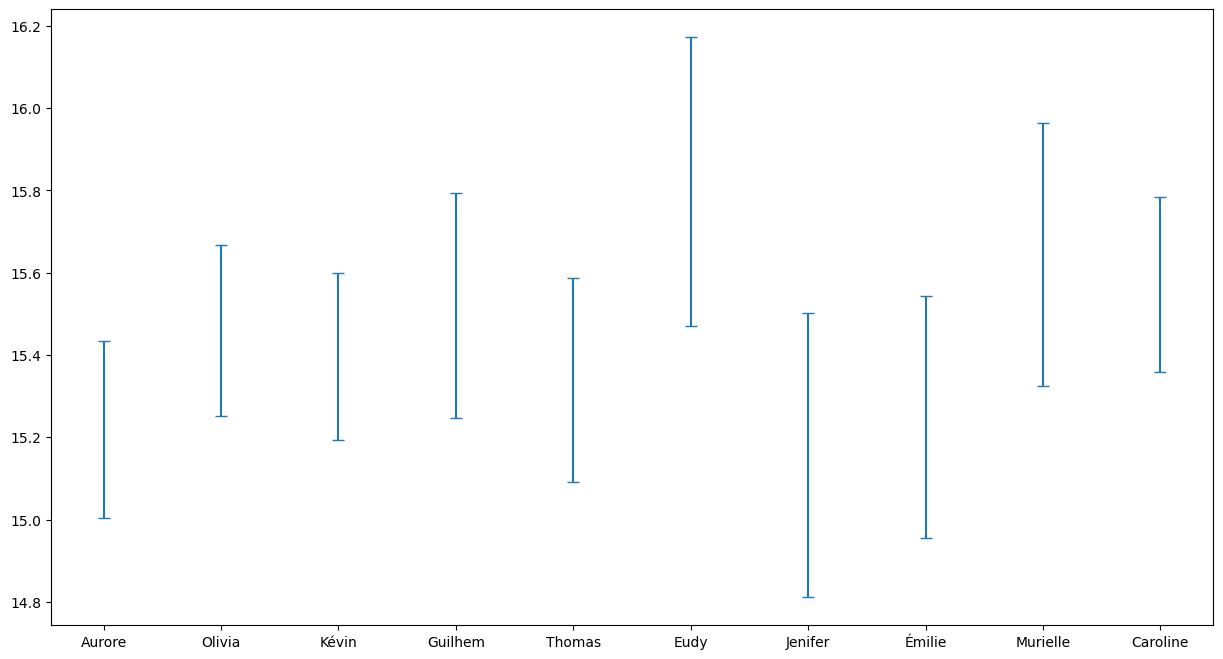

In [19]:
#Représentation graphique des résultats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)

xs = np.arange(len(students))
ax1 = fig.add_subplot(gs[0,0])

ax1.errorbar(xs, Vr[:,9], yerr=Vr[:,15], xerr=None,ls='',capsize=4)
ax1.set_xticks(xs)
ax1.set_xticklabels(students)
plt.show()